In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

Seaborn comes with some test datasets. We will import one called 'Tips'

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A simple distribution plot of the count of total bills.

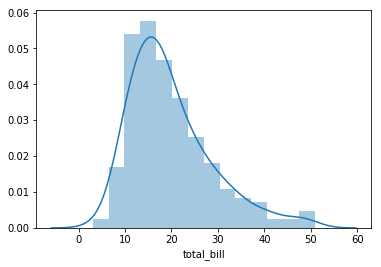

In [4]:
sns.distplot(tips['total_bill'])

If you want **only** the KDE plot

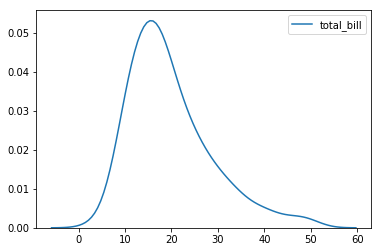

In [5]:
sns.kdeplot(tips['total_bill'])

The KDE line can be removed by setting the attribute to False.

Bin count can be varied based on the dataset. In this case, we find that 30 is a good number for this data.

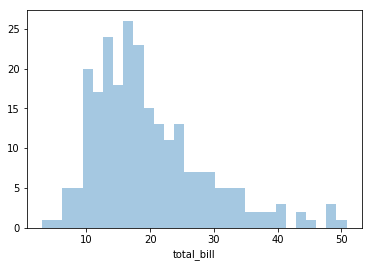

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

Suppose we want to compare a distribution of the total bill vs the tip size.

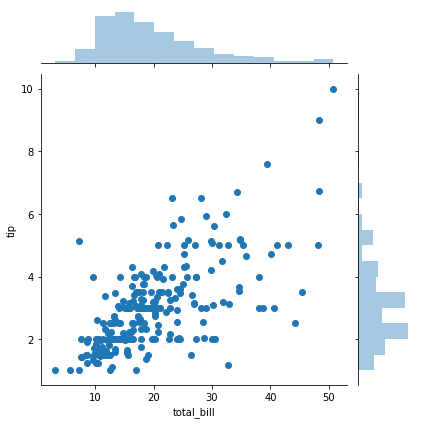

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)

---

### Kind parameter

The kind parameter allows you to set the type of plot you wish to generate.

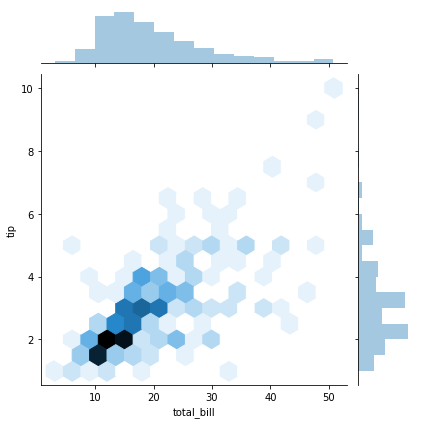

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

`kind` includes an option for drawing a linear regression through your data

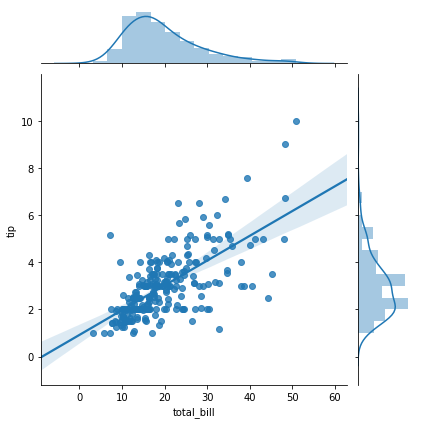

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

`kind` can also do a 2-dimensional KDE

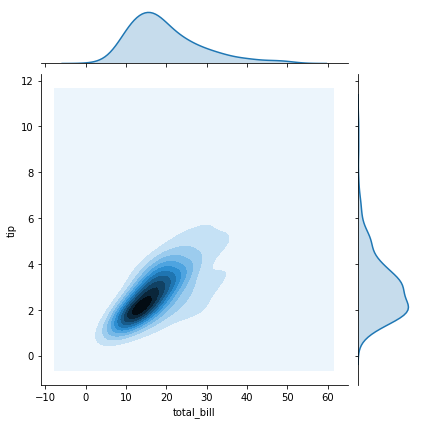

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

---

## .pairplot()

Plot pair-wise relationships across an entire dataframe with numerical columns.
This is convenient for quickly visualizing your data.

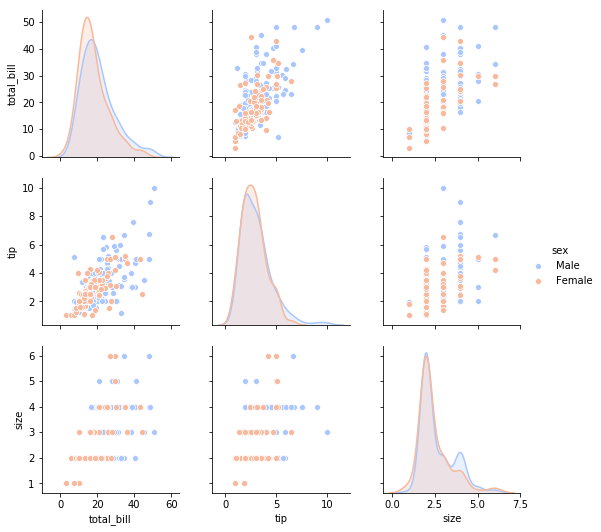

In [11]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

---

## .rugplot()

`.rugplot()` draws a line for every point of data.

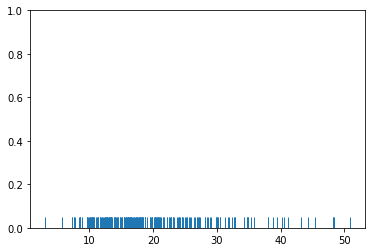

In [12]:
sns.rugplot(tips['total_bill'])

---

## Kernel Density Estimation

This is the average of all gaussian distributions around the point of data.

Let's demonstrate this idea using `.rugplot()`

(0, 1)

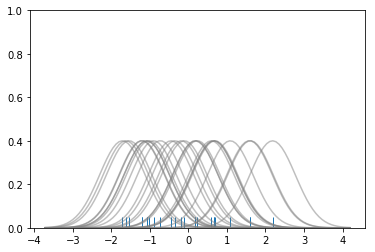

In [13]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

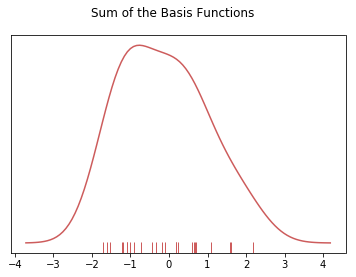

In [14]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")